# Import libraries

In [3]:
# Data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing and data transformation
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Warnings handling
import warnings
warnings.filterwarnings('ignore')

# 1. Import Data

In [4]:
# Define the file path
file_path = 'dataset/house-prices/train.csv'

# Read the CSV file into a DataFrame
df_train = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. Quick Analyse Dataset
To help in understanding the sctructure and characteristics of the dataset

In [5]:
# Checking the entire DataFrame

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [7]:
df_train.shape

(1460, 81)

# 3. Split Data

In [8]:
# Separate the features and the target variable
X = df_train.drop('SalePrice', axis=1)  # Features (all columns except 'SalePrice')
y = df_train['SalePrice']               # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1998
)

# 4. Drop the unwanted columns

In [9]:
# Checking the percentage of missing value oneach columns

missing_values = X_train.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_percentage = (missing_values / len(X_train)) * 100

print(missing_percentage)

LotFrontage     16.866438
Alley           93.835616
MasVnrType      59.760274
MasVnrArea       0.684932
BsmtQual         2.568493
BsmtCond         2.568493
BsmtExposure     2.654110
BsmtFinType1     2.568493
BsmtFinType2     2.654110
Electrical       0.085616
FireplaceQu     47.174658
GarageType       4.794521
GarageYrBlt      4.794521
GarageFinish     4.794521
GarageQual       4.794521
GarageCond       4.794521
PoolQC          99.571918
Fence           80.222603
MiscFeature     95.976027
dtype: float64


In [10]:
# Checking columns that have many missing data

columns_to_drop = missing_percentage[missing_percentage > 30].index

X_train.drop(columns=columns_to_drop, inplace=True)

print(X_train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
768    769          20       RL         70.0     9100   Pave      Reg   
1102  1103          20       RL         70.0     7000   Pave      Reg   
816    817          20       RL          NaN    11425   Pave      IR1   
391    392          60       RL         71.0    12209   Pave      IR1   
747    748          70       RM         65.0    11700   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
224    225          20       RL        103.0    13472   Pave      Reg   
1188  1189          60       RL         68.0     8935   Pave      IR1   
897    898          90       RL         64.0     7018   Pave      Reg   
673    674          20       RL        110.0    14442   Pave      Reg   
840    841          70       RH          NaN    12155   Pave      IR1   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
768          Lvl    AllPub    Inside  ... 

In [11]:
columns_to_fill = missing_percentage[missing_percentage < 30].index
columns_to_fill

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [13]:
for column in columns_to_fill:
    if X_train[column].dtype == "float64" or X_train[column].dtype == "int64":
        X_train[column].fillna(X_train[column].mean(), inplace=True)
    else:

        X_train[column].fillna(X_train[column].mode()[0], inplace=True)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
X_train.isnull().sum().sum()

0

In [12]:
X_train.Id.nunique()

1168

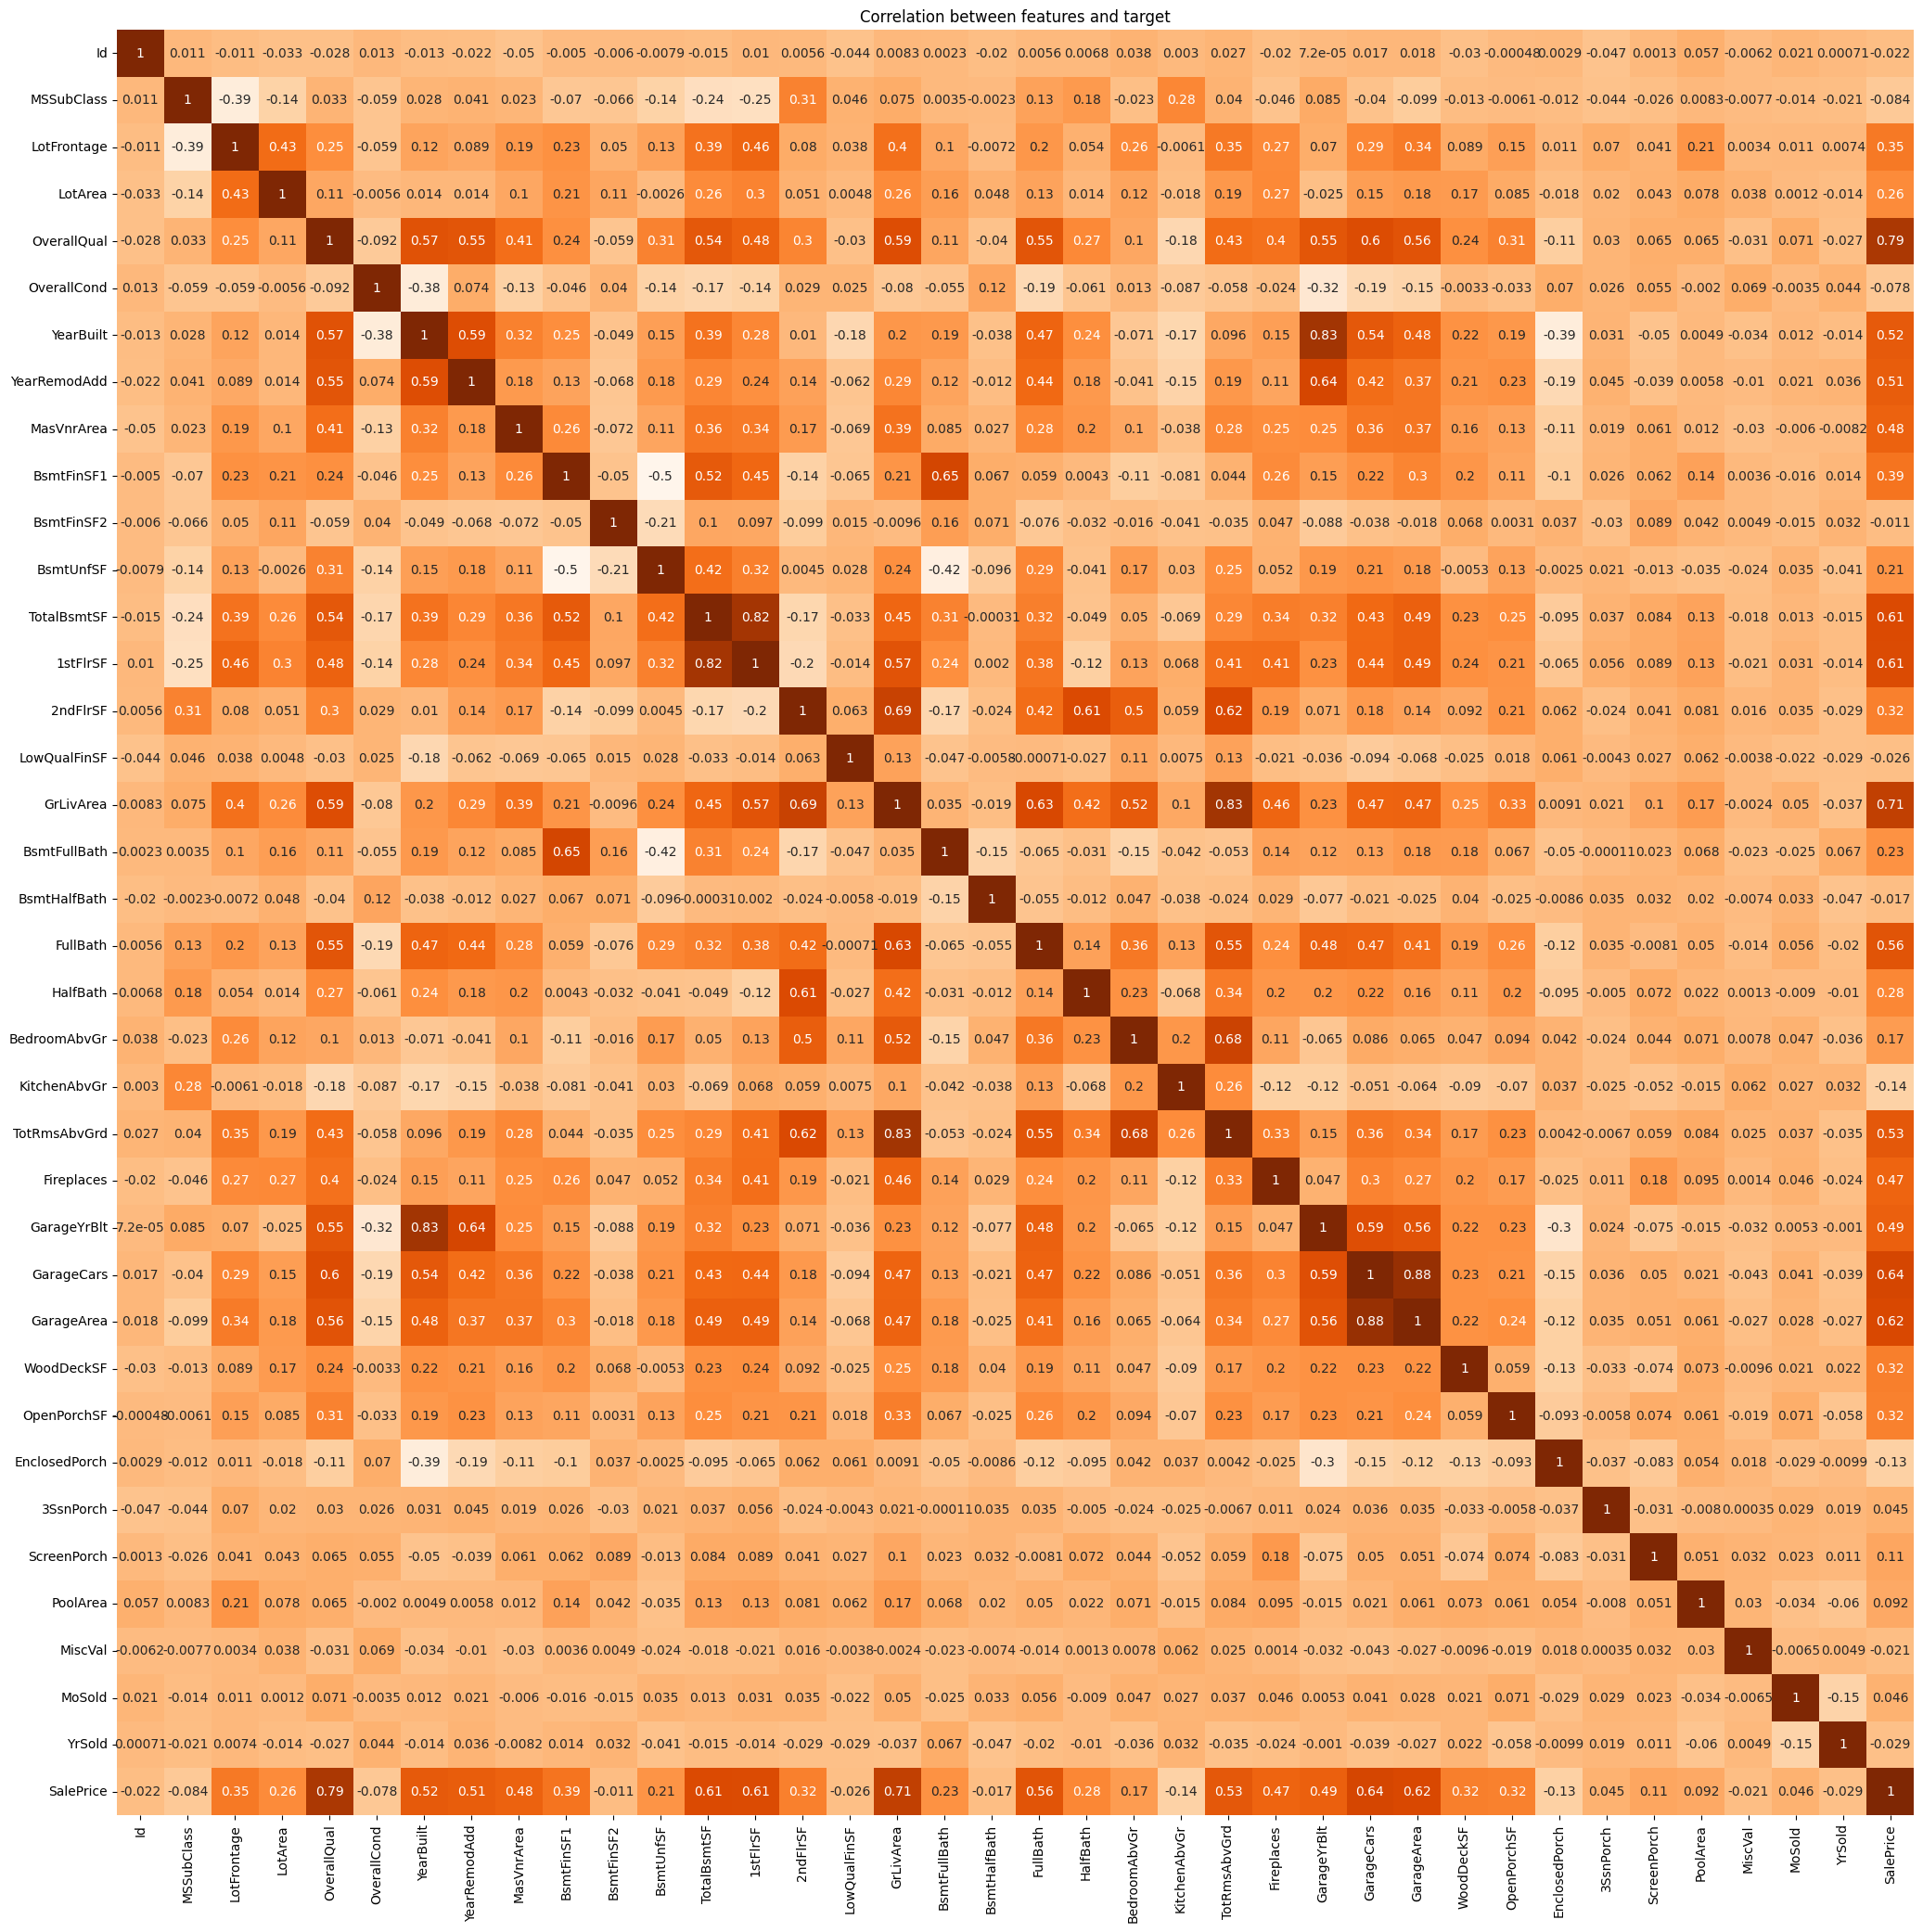

In [13]:
corr = df_train.select_dtypes(exclude=['object']).corr()
plt.subplots(1,1, figsize=(25,25))
sns.heatmap(data=corr, cmap ='Oranges', annot = corr, cbar=None)
plt.title('Correlation between features and target')
plt.show()

Remove features with a very low correlation

In [14]:
X_train.drop(columns=['Id'], inplace=True)
X_train.drop(columns=['LowQualFinSF'], inplace=True)
X_train.drop(columns=['BsmtHalfBath'], inplace=True)
X_train.drop(columns=['KitchenAbvGr'], inplace=True)
X_train.drop(columns=['EnclosedPorch'], inplace=True)
X_train.drop(columns=['3SsnPorch'], inplace=True)
X_train.drop(columns=['ScreenPorch'], inplace=True)
X_train.drop(columns=['PoolArea'], inplace=True)
X_train.drop(columns=['MiscVal'], inplace=True)
X_train.drop(columns=['MoSold'], inplace=True)
X_train.drop(columns=['YrSold'], inplace=True)
X_train.drop(columns=['MSSubClass'], inplace=True)
X_train.drop(columns=['OverallCond'], inplace=True)
X_train.drop(columns=['BsmtFinSF2'], inplace=True)


In [15]:
num_data = X_train.select_dtypes(include=np.number).columns.tolist()
cat_data = X_train.select_dtypes(exclude=np.number).columns.tolist()

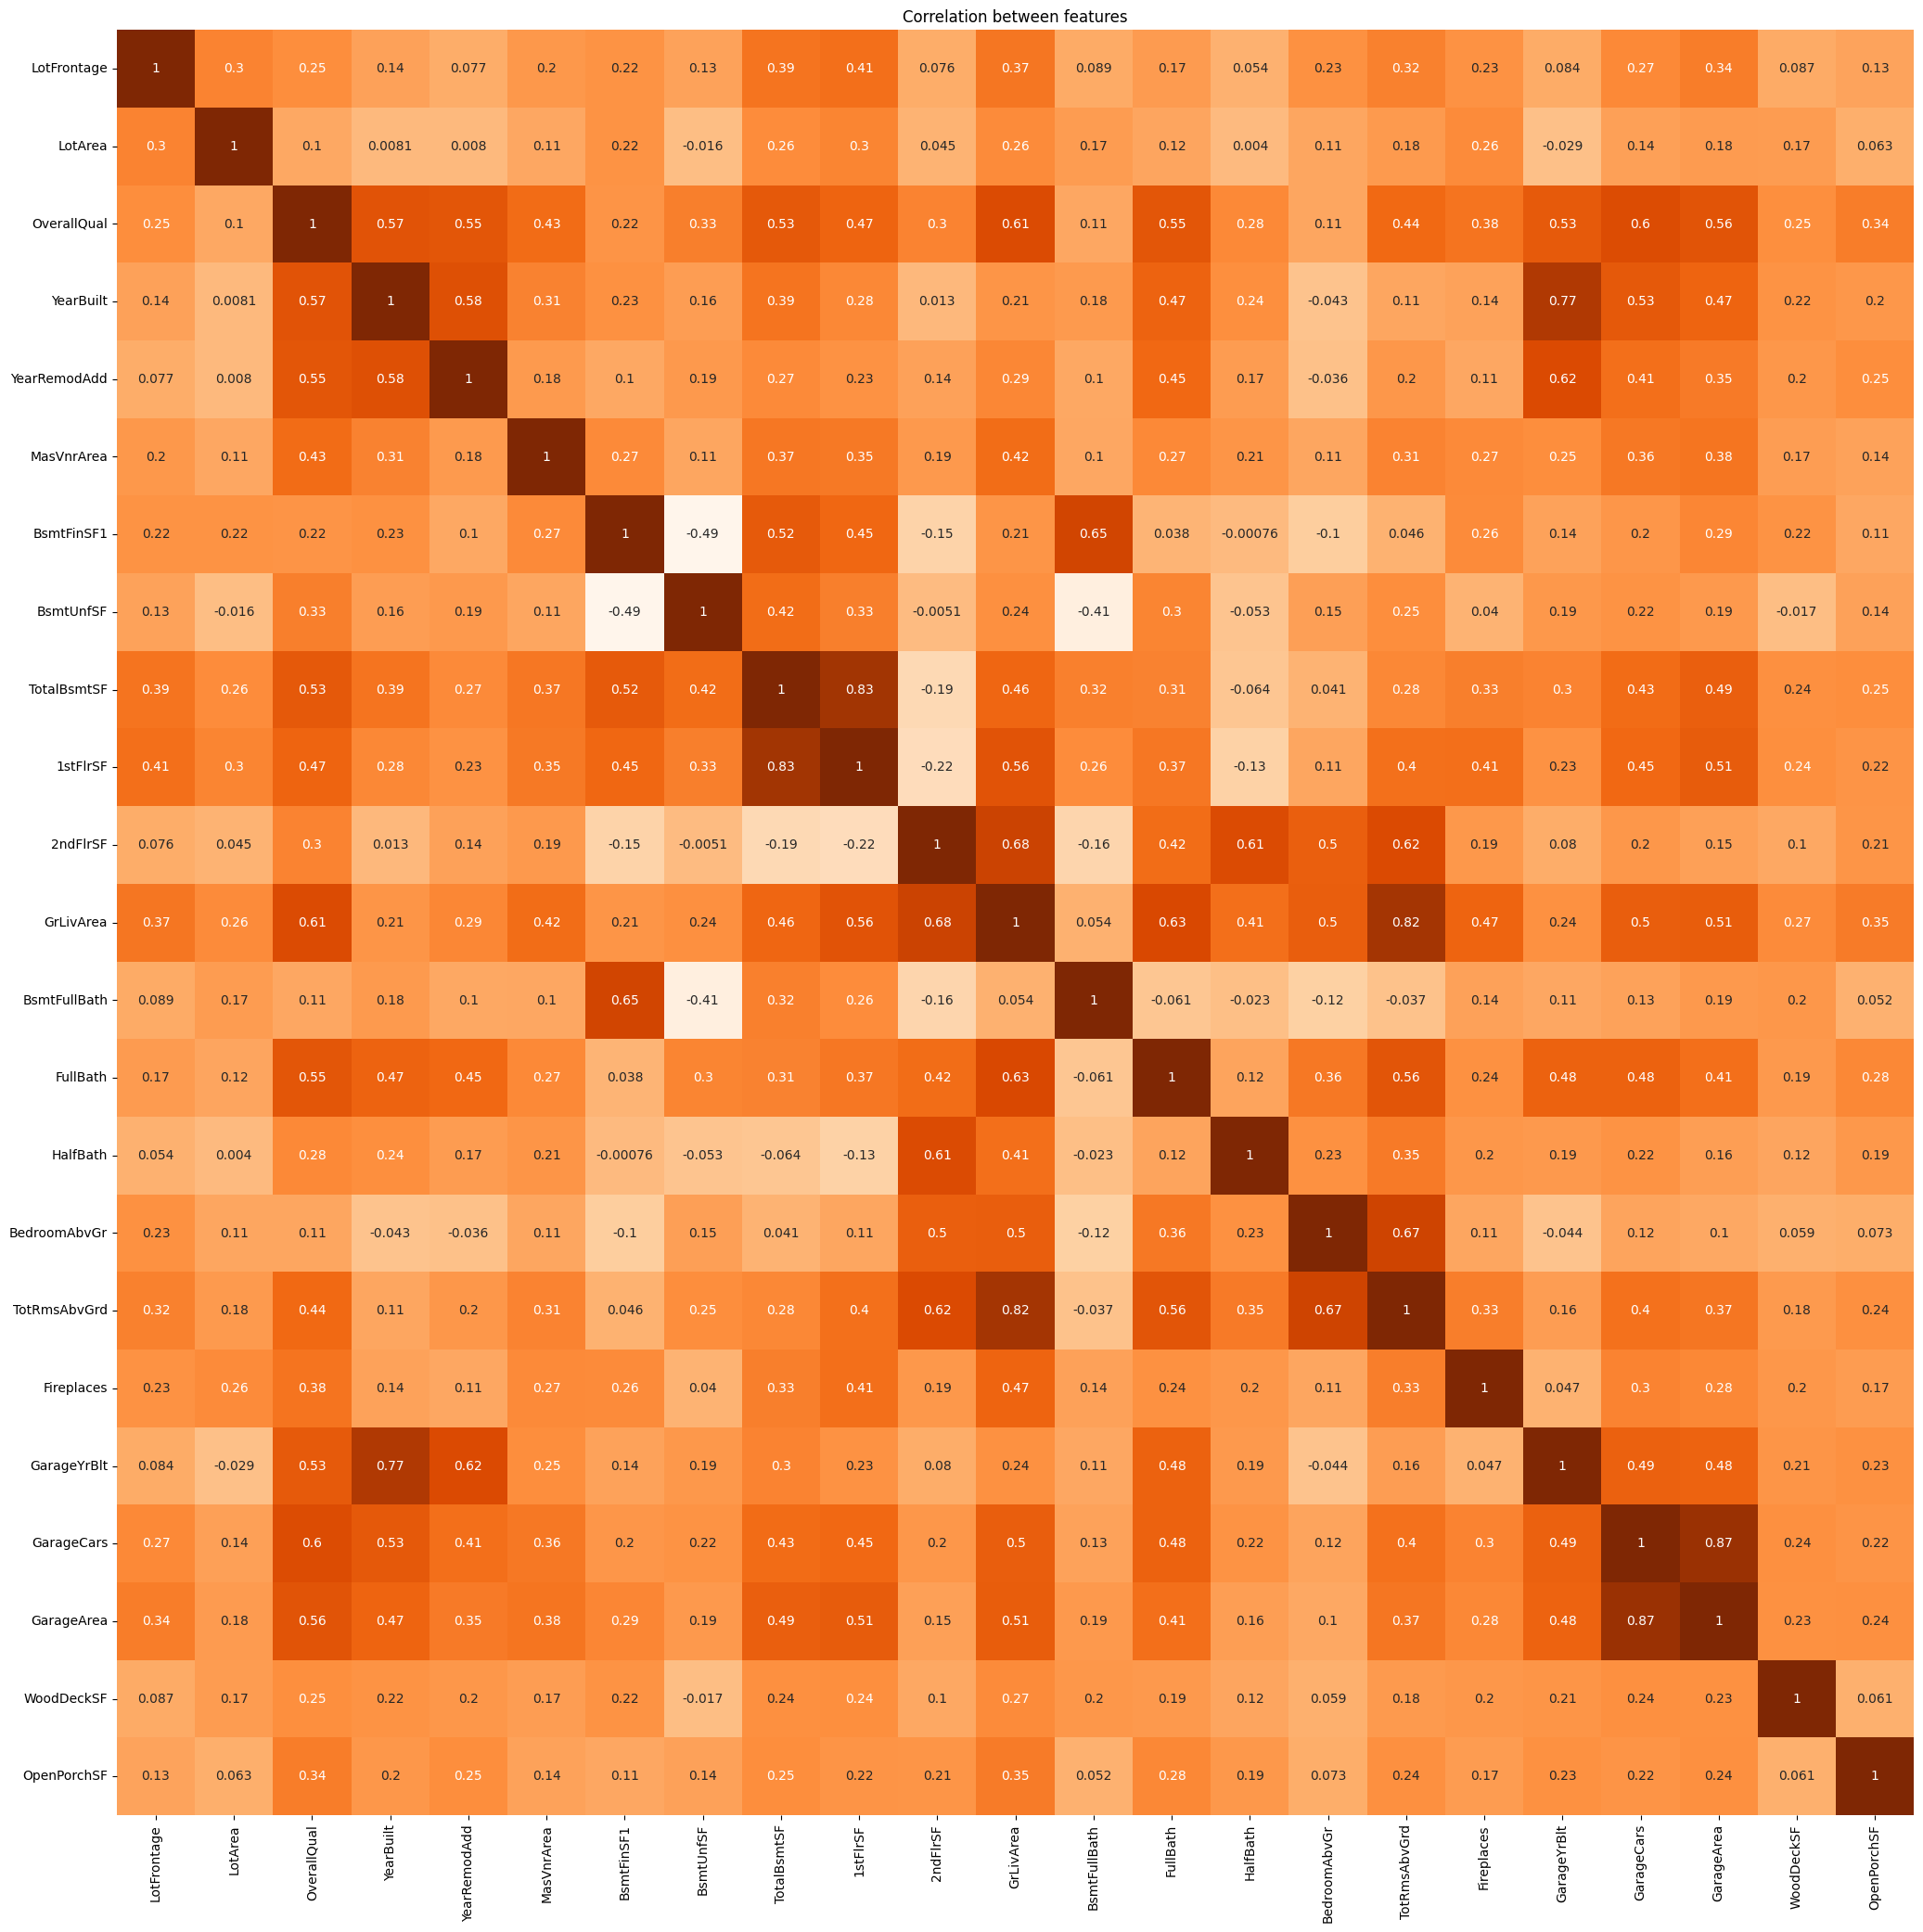

In [16]:
corr = X_train[num_data].corr()
plt.subplots(1,1, figsize=(25,25))
sns.heatmap(data=corr, cmap ='Oranges', annot = corr, cbar=None)
plt.title('Correlation between features')
plt.show()

Remove features with a correlation greater than 0.6

In [17]:
# Based on heatmap above we remove these columns

num_data.remove('GarageArea')
num_data.remove('1stFlrSF')
num_data.remove('GrLivArea')
num_data.remove('BsmtFullBath')
num_data.remove('FullBath')
num_data.remove('HalfBath')
num_data.remove('TotRmsAbvGrd')
num_data.remove('GarageYrBlt')

# 5. Outliers EDA

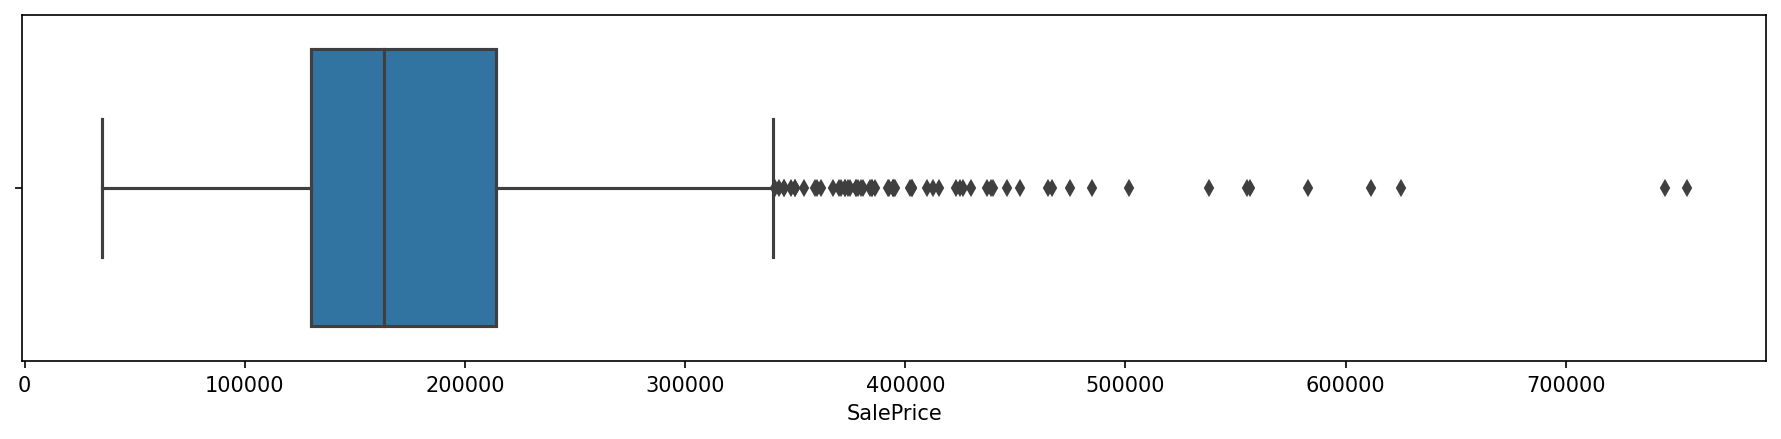

In [18]:
# Set up the figure size and DPI
plt.figure(figsize=(15, 3), dpi=150)

# Create the boxplot
sns.boxplot(x=y)

# Set the plot orientation
plt.xlabel('SalePrice')

# Show the plot
plt.show()

In [19]:
# Calculate Q1 and Q3
q1 = y.quantile(0.25)
q3 = y.quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Define the upper boundary for outliers
upper_boundary = q3 + 1.5 * iqr

print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Upper boundary for outliers: {upper_boundary}")

Q1: 129975.0
Q3: 214000.0
IQR: 84025.0
Upper boundary for outliers: 340037.5


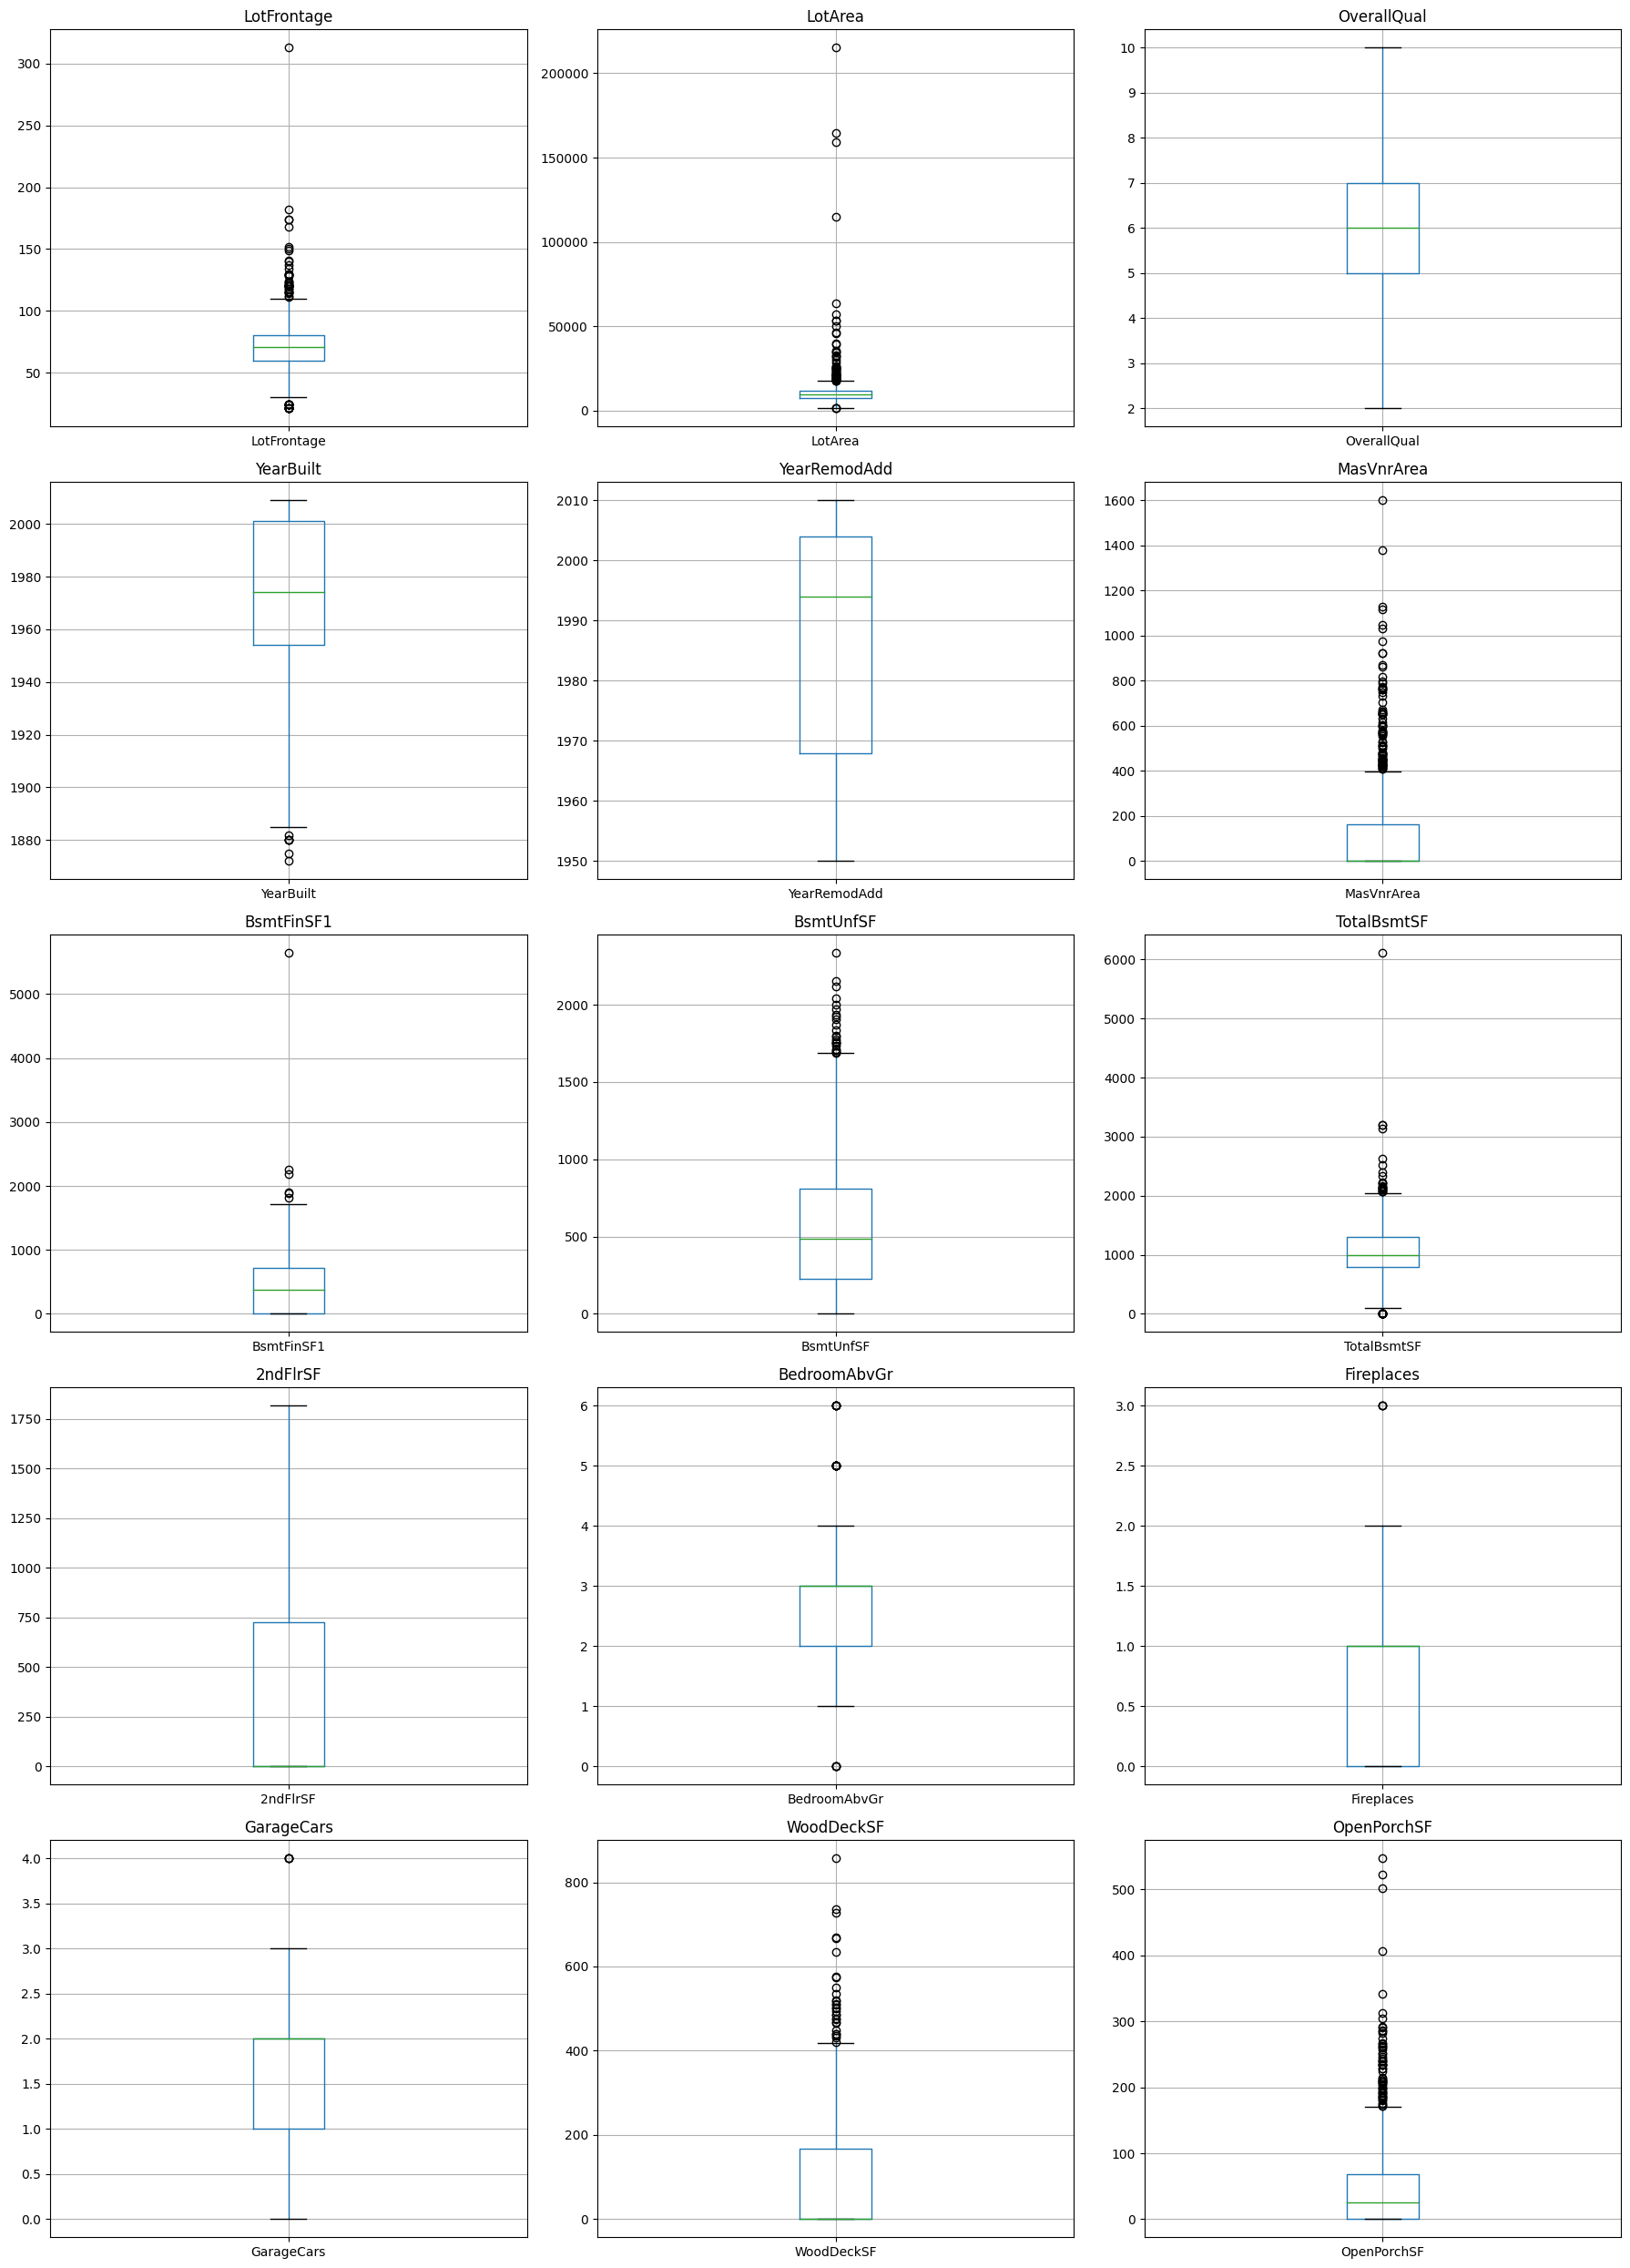

In [20]:
# Number of features to plot
n_features = len(num_data)

# Number of columns per row
n_cols = 3

# Calculate the number of rows needed
n_rows = np.ceil(n_features / n_cols).astype(int)

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the boxplots
for i, feature in enumerate(num_data):
    X_train[[feature]].boxplot(ax=axes[i])
    axes[i].set_title(feature)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [21]:
# Checking the entire DataFrame

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 6. Pipeline

In [22]:
df_encoded_test

complete_pipeline

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['LotFrontage', 'LotArea', 'OverallQual',
                                  'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '2ndFlrSF', 'BedroomAbvGr', 'Fireplaces',
                                  'GarageCars', 'WoodDeckSF', 'OpenPorchSF']),
                                ('cat_pipe',
                                 Pipeline(st...
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual',
                                  'Functional', ...])])

# 7. Modeling

In [23]:
def prediction(model):
    pipeline = Pipeline([
        ('preprocessor', complete_pipeline),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)  
        
    print(f"{model}")
    print(f"RMSE is {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"MAE is {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE is {mean_squared_error(y_test, y_pred)}")
    print(f"R2 is {r2_score(y_test, y_pred)}")

In [24]:
prediction(LinearRegression())

LinearRegression()
RMSE is 30898.04834007132
MAE is 18804.722144737596
MSE is 954689391.225384
R2 is 0.8664025092768458


In [25]:
prediction(DecisionTreeRegressor(random_state=1998))

DecisionTreeRegressor(random_state=1998)
RMSE is 52410.31698909347
MAE is 30770.31506849315
MSE is 2746841326.89726
R2 is 0.6156120387835142


In [26]:
prediction(RandomForestRegressor(n_estimators=100, random_state=1998,n_jobs=-1))

RandomForestRegressor(n_jobs=-1, random_state=1998)
RMSE is 35590.943434178465
MAE is 20269.253047945207
MSE is 1266715254.5348914
R2 is 0.8227381795356611


In [27]:
prediction(GradientBoostingRegressor(random_state=1998))

GradientBoostingRegressor(random_state=1998)
RMSE is 30935.23666801091
MAE is 18413.813214262358
MSE is 956988867.7058469
R2 is 0.8660807247356219


In [28]:
prediction(RidgeCV())

RidgeCV()
RMSE is 36204.03111257442
MAE is 20364.768946173295
MSE is 1310731868.8002565
R2 is 0.816578574883059


In [29]:
prediction(ElasticNetCV())

ElasticNetCV()
RMSE is 81553.6411511983
MAE is 54665.014659018205
MSE is 6650996385.018426
R2 is 0.0692717065738715


In [30]:
prediction(LassoCV())

LassoCV()
RMSE is 30900.01766197192
MAE is 17917.552703882753
MSE is 954811091.5101765
R2 is 0.866385478761143


In [31]:
best_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=1998)
prediction(best_model)

GradientBoostingRegressor(max_depth=4, n_estimators=300, random_state=1998)
RMSE is 30872.380445254876
MAE is 17856.401186378953
MSE is 953103874.3565557
R2 is 0.8666243836132757


# 8. Submission

In [32]:
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
id = df_test['Id'].copy()
df_test = df_test.drop('Id', axis=1)
test_preprocessed = complete_pipeline.transform(df_test)
predictions = best_model.predict(test_preprocessed)
predictions_df = pd.DataFrame({
    'Id': id, 
    'SalePrice': predictions
})
predictions_df.to_csv('/kaggle/working/predicted_prices_submission.csv', index=False)

print("Done，results saved into /kaggle/working/predicted_prices_submission.csv")

Done，results saved into /kaggle/working/predicted_prices_submission.csv


In [33]:
submission= pd.DataFrame(data = {'Id': range(1461,2920),
                                'SalePrice': predictions})
submission

,Id,SalePrice
0,1461,122275.496201
1,1462,156236.118573
2,1463,177980.562375
3,1464,189670.484689
4,1465,191419.062503
...,...,...
1454,2915,81820.027822
1455,2916,76984.762370
1456,2917,168257.897810
1457,2918,115124.547970


In [34]:
predictions_df.head()

,Id,SalePrice
0,1461,122275.496201
1,1462,156236.118573
2,1463,177980.562375
3,1464,189670.484689
4,1465,191419.062503
